In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [30]:
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Activation, Dense, Dropout
from keras.utils import np_utils

from keras.datasets import mnist

import matplotlib.pyplot as plt

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

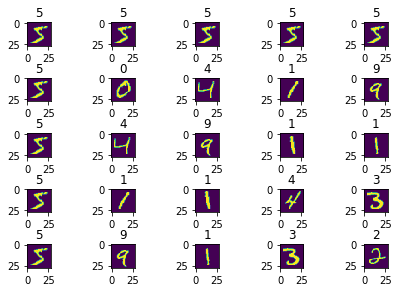

In [4]:
fig, ax = plt.subplots(nrows=5, ncols=5)
fig.tight_layout()
for i in range(5):
    for j in range(5):
        image, label = train_images[i*j], train_labels[i*j]
        axi = ax[i, j]
        axi.imshow(image)
        axi.set_title(str(label))

In [5]:
train_images[0].shape

(28, 28)

In [6]:
train_images.shape

(60000, 28, 28)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
train_images_ = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images_ = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [9]:
test_labels_ = np_utils.to_categorical(test_labels, 10)
train_labels_ = np_utils.to_categorical(train_labels, 10)

In [10]:
test_labels_[1], test_labels[1]

(array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32), 2)

In [11]:
test_images_[0].shape

(28, 28, 1)

In [102]:
model = Sequential()

model.add(Conv2D(64, 3, activation='relu', input_shape=train_images_[0].shape))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation='relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
          
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_177 (Conv2D)          (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_79 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_178 (Conv2D)          (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_80 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_179 (Conv2D)          (None, 3, 3, 64)          36928     
_________________________________________________________________
dropout_32 (Dropout)         (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_41 (Flatten)         (None, 576)             

In [103]:
model.fit(train_images_, train_labels_, batch_size=256, epochs=12, validation_data=(test_images_, test_labels_))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 27s 448us/step - loss: 0.5778 - accuracy: 0.8871 - val_loss: 0.0665 - val_accuracy: 0.9796
Epoch 2/12
60000/60000 [==============================] - 27s 445us/step - loss: 0.0941 - accuracy: 0.9715 - val_loss: 0.0501 - val_accuracy: 0.9845
Epoch 3/12
60000/60000 [==============================] - 27s 445us/step - loss: 0.0621 - accuracy: 0.9811 - val_loss: 0.0403 - val_accuracy: 0.9867
Epoch 4/12
60000/60000 [==============================] - 27s 448us/step - loss: 0.0489 - accuracy: 0.9845 - val_loss: 0.0429 - val_accuracy: 0.9876
Epoch 5/12
60000/60000 [==============================] - 27s 444us/step - loss: 0.0449 - accuracy: 0.9859 - val_loss: 0.0376 - val_accuracy: 0.9883
Epoch 6/12
60000/60000 [==============================] - 27s 443us/step - loss: 0.0346 - accuracy: 0.9888 - val_loss: 0.0401 - val_accuracy: 0.9886
Epoch 7/12
60000/60000 [==============================] 

In [104]:
model.evaluate(test_images_, test_labels_)

10000/10000 [==============================] - 1s 148us/step


[0.03444110200128452, 0.9901999831199646]